
---

## Roadmap: Exploratory Data Analysis of Restaurant Data

### Level 1: Basic Restaurant Insights

**Task 1: Top Cuisines**
- Determine the top three most common cuisines.
- Calculate the percentage of restaurants serving each of the top cuisines.

**Task 2: City Analysis**
- Identify the city with the highest number of restaurants.
- Calculate the average rating for restaurants in each city.
- Determine the city with the highest average rating.

**Task 3: Price Range Distribution**
- Create a histogram or bar chart to visualize the distribution of price ranges.
- Calculate the percentage of restaurants in each price range category.

**Task 4: Online Delivery**
- Determine the percentage of restaurants offering online delivery.
- Compare the average ratings of restaurants with and without online delivery.

### Level 2: Advanced Insights

**Task 1: Cuisine Combination**
- Identify the most common combinations of cuisines.
- Determine if certain cuisine combinations tend to have higher ratings.

**Task 2: Geographic Analysis**
- Plot the locations of restaurants on a map using longitude and latitude coordinates.
- Identify any patterns or clusters of restaurants in specific areas.

**Task 3: Restaurant Chains**
- Identify if there are any restaurant chains present in the dataset.
- Analyze the ratings and popularity of different restaurant chains.

**Task 4: Restaurant Reviews**
- Analyze the text reviews to identify the most common positive and negative keywords.
- Calculate the average length of reviews and explore the relationship between review length and rating.

### Level 3: Advanced Analysis

**Task 1: Votes Analysis**
- Identify the restaurants with the highest and lowest number of votes.
- Analyze if there is a correlation between the number of votes and the rating of a restaurant.

**Task 2: Price Range vs. Online Delivery and Table Booking**
- Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
- Determine if higher-priced restaurants are more likely to offer these services.

### Conclusion
- Summarize key findings and insights obtained from the analysis.
- Provide recommendations or insights that can inform decision-making within the restaurant industry.

---


In [61]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
import seaborn as sns

In [62]:
hotel = pd.read_csv('Dataset.csv')

In [63]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Level 1

1. Task: Top Cuisines
          A } Determine the top three most common cuisines in the dataset.
          B } Calculate the percentage of restaurants that serve each of the top cuisines.






In [64]:

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('Dataset.csv')

# Determine the top three most common cuisines
top_cuisines = df['Cuisines'].value_counts().head(3)

# Print the top three cuisines
print("Top three most common cuisines:")
print(top_cuisines)

Top three most common cuisines:
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: Cuisines, dtype: int64


In [65]:
# Determine the top three most common cuisines
top_cuisines = df['Cuisines'].value_counts().head(3)

# Calculate the percentage of restaurants that serve each of the top cuisines
total_restaurants = len(df)

# Calculate the percentage for each cuisine
percentage_per_cuisine = (top_cuisines / total_restaurants) * 100

# Print the percentage for each cuisine
print("Percentage of restaurants that serve each of the top cuisines:")
for cuisine, percentage in percentage_per_cuisine.items():
    print(f"{cuisine}: {percentage:.2f}%")


Percentage of restaurants that serve each of the top cuisines:
North Indian: 9.80%
North Indian, Chinese: 5.35%
Chinese: 3.71%


2. Task: City Analysis
         A } Identify the city with the highest number of restaurants in the dataset.
         B } Calculate the average rating for restaurants in each city.
         C } Determine the city with the highest average rating.

In [66]:
# Identify the city with the highest number of restaurants
city_with_most_restaurants = df['City'].value_counts().idxmax()
print(f"The city with the highest number of restaurants is: {city_with_most_restaurants}")

The city with the highest number of restaurants is: New Delhi


In [67]:
# Calculate the average rating for restaurants in each city
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean()
print("Average ratings by city:")
print(average_rating_by_city)

Average ratings by city:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


In [68]:
# Calculate the average rating for restaurants in each city
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean()

# Determine the city with the highest average rating
city_with_highest_avg_rating = average_rating_by_city.idxmax()
highest_avg_rating = average_rating_by_city.max()
print(f"The city with the highest average rating is: {city_with_highest_avg_rating}")
print(f"The highest average rating in that city is: {highest_avg_rating}")

The city with the highest average rating is: Inner City
The highest average rating in that city is: 4.9


3. Task:  Price Range Distribution
        A } Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
        B } Calculate the percentage of restaurants in each price range category.

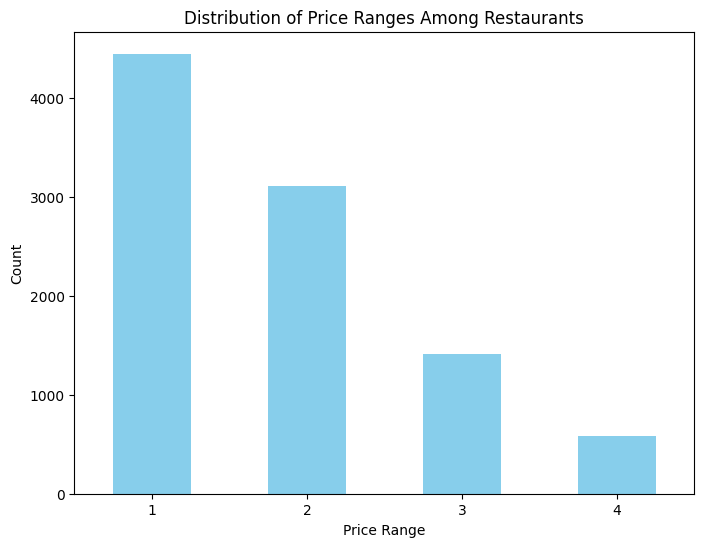

In [69]:


# Create a bar chart for the distribution of price ranges
plt.figure(figsize=(8, 6))
df['Price range'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xticks(rotation=0)
plt.show()

In [70]:
# Calculate the percentage of restaurants in each price range category
price_range_percentage = df['Price range'].value_counts(normalize=True) * 100

# Print the result
print("Percentage of restaurants in each price range category:")
for price_range, percentage in price_range_percentage.items():
    print(f"Price Range {price_range}: {percentage:.2f}%")

Percentage of restaurants in each price range category:
Price Range 1: 46.53%
Price Range 2: 32.59%
Price Range 3: 14.74%
Price Range 4: 6.14%


4. Task: Online Delivery

        A } Determine the percentage of restaurants that offer online delivery.
        B } Compare the average ratings of restaurants with and without online delivery.

In [71]:
# Calculate the percentage of restaurants that offer online delivery
total_restaurants = len(df)
restaurants_with_online_delivery = len(df[df['Has Online delivery'] == 'Yes'])
percentage_with_online_delivery = (restaurants_with_online_delivery / total_restaurants) * 100

print(f"Percentage of restaurants that offer online delivery: {percentage_with_online_delivery:.2f}%")

Percentage of restaurants that offer online delivery: 25.66%


In [72]:
# Filter the DataFrame for restaurants with and without online delivery
restaurants_with_delivery = df[df['Has Online delivery'] == 'Yes']
restaurants_without_delivery = df[df['Has Online delivery'] == 'No']

# Calculate the average ratings for each group
average_rating_with_delivery = restaurants_with_delivery['Aggregate rating'].mean()
average_rating_without_delivery = restaurants_without_delivery['Aggregate rating'].mean()

print(f"Average rating for restaurants with online delivery: {average_rating_with_delivery:.2f}")
print(f"Average rating for restaurants without online delivery: {average_rating_without_delivery:.2f}")

Average rating for restaurants with online delivery: 3.25
Average rating for restaurants without online delivery: 2.47


# Level 2

1. Task: Restaurant Ratings
        A } Analyze the distribution of aggregateratings and determine the most common rating range.
        B } Calculate the average number of votes received by restaurants.




In [73]:
# Task A: Analyze the distribution of Aggregate Ratings
rating_counts = df['Aggregate rating'].value_counts().reset_index()
rating_counts.columns = ['Aggregate rating', 'Count']
rating_counts = rating_counts.sort_values(by='Count', ascending=False)

# Determine the most common rating range
most_common_rating = rating_counts.iloc[0]

print("Distribution of Aggregate Ratings:")
print(rating_counts)
print("\nMost Common Rating Range:")
print(most_common_rating)

Distribution of Aggregate Ratings:
    Aggregate rating  Count
0                0.0   2148
1                3.2    522
2                3.1    519
3                3.4    498
4                3.3    483
5                3.5    480
6                3.0    468
7                3.6    458
8                3.7    427
9                3.8    400
10               2.9    381
11               3.9    335
12               2.8    315
13               4.1    274
14               4.0    266
15               2.7    250
16               4.2    221
17               2.6    191
18               4.3    174
19               4.4    144
20               2.5    110
21               4.5     95
22               2.4     87
23               4.6     78
24               4.9     61
25               2.3     47
26               4.7     42
27               2.2     27
28               4.8     25
29               2.1     15
30               2.0      7
31               1.9      2
32               1.8      1

Most Common 

In [74]:
# Task B: Calculate the average number of votes received by restaurants
average_votes = df['Votes'].mean()

print(f"Average Number of Votes Received by Restaurants: {average_votes:.2f}")

Average Number of Votes Received by Restaurants: 156.91


2. Task: Cuisine Combination
         A } Identify the most common combinations of cuisines in the  dataset.
         B } Determine if certain cuisine combinations tend to have higher ratings.

In [75]:


# Split the 'Cuisines' column into individual cuisine types and create a list of all cuisines
cuisines_list = df['Cuisines'].str.split(', ').explode()

# Count the occurrences of each cuisine type
cuisine_counts = Counter(cuisines_list)

# Find the most common cuisine combinations
most_common_cuisines = cuisine_counts.most_common(10)  # Change 10 to the desired number of top combinations

# Print the most common cuisine combinations
print("Most common cuisine combinations:")
for cuisine, count in most_common_cuisines:
    print(f"{cuisine}: {count} times")

Most common cuisine combinations:
North Indian: 3960 times
Chinese: 2735 times
Fast Food: 1986 times
Mughlai: 995 times
Italian: 764 times
Bakery: 745 times
Continental: 736 times
Cafe: 703 times
Desserts: 653 times
South Indian: 636 times


In [76]:
# Group the data by cuisine combinations and calculate the average rating for each combination
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort the combinations by average rating in descending order
sorted_cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Print the top-rated cuisine combinations
print("Top-rated cuisine combinations:")
print(sorted_cuisine_ratings.head(10))  # Change 10 to the desired number of top combinations

Top-rated cuisine combinations:
                      Cuisines  Aggregate rating
1062             Italian, Deli               4.9
949          Hawaiian, Seafood               4.9
93     American, Sandwich, Tea               4.9
683        Continental, Indian               4.9
796    European, Asian, Indian               4.9
803     European, Contemporary               4.9
808           European, German               4.9
169   BBQ, Breakfast, Southern               4.9
41    American, Coffee and Tea               4.9
1779         Sunda, Indonesian               4.9


3. Task: Geographic Analysis
         A } Plot the locations of restaurants on a map using longitude and latitude coordinates.
         B } Identify any patterns or clusters of restaurants in specific areas

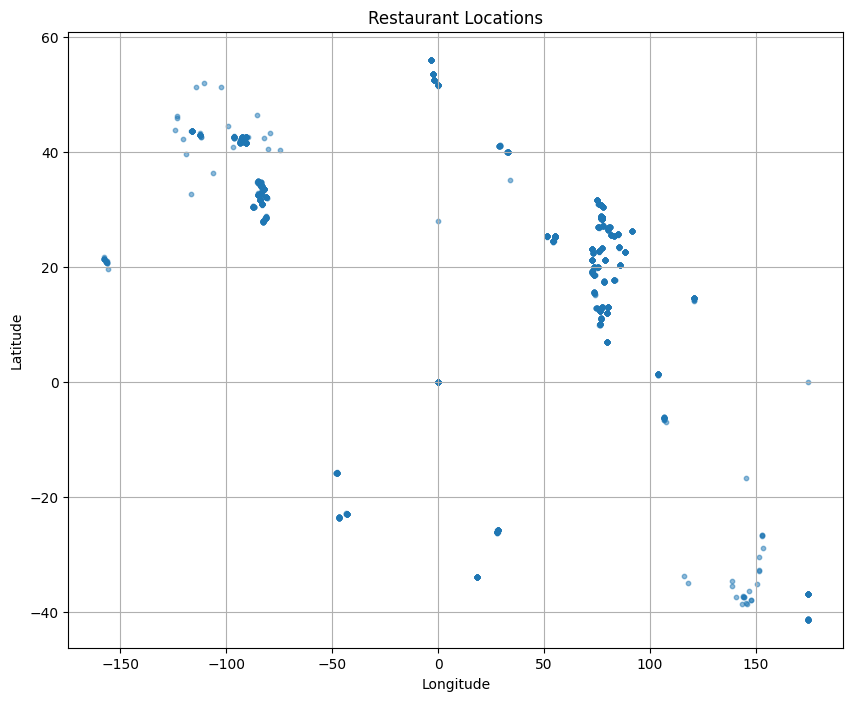

In [77]:
# Create a scatter plot of restaurant locations
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], marker='o', s=10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Locations')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


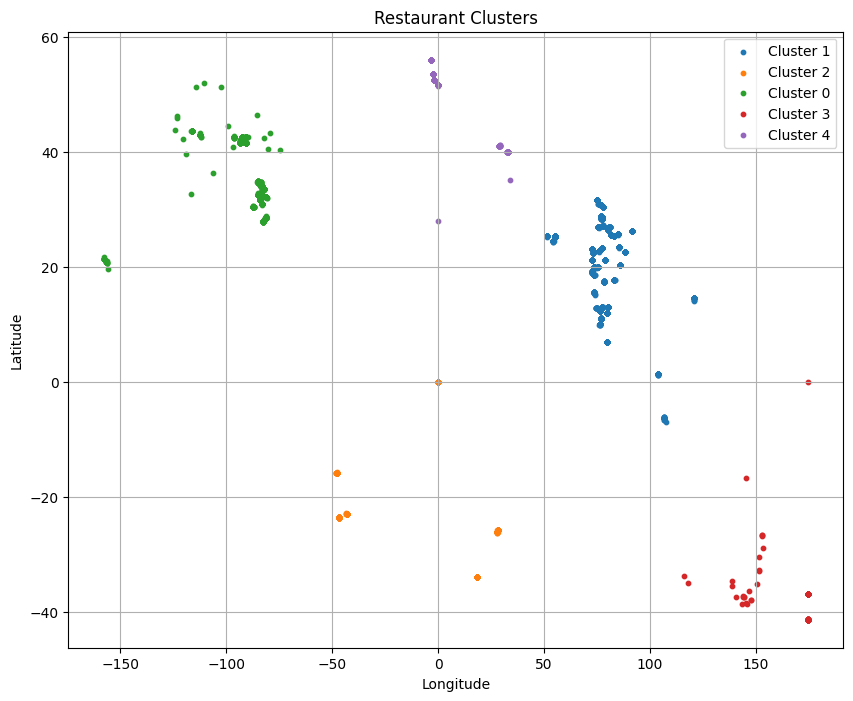

In [78]:


# Select the latitude and longitude columns
locations = df[['Latitude', 'Longitude']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  # You can change the number of clusters as needed
kmeans.fit(locations)
df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}', s=10)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Clusters')
plt.legend()
plt.grid(True)
plt.show()

4. Task: Restaurant Chains
         A } Identify if there are any restaurant chains present in the dataset.
         B  } Analyze the ratings and popularity of different restaurant chains.

In [79]:
# Group the DataFrame by 'Restaurant Name' and count the number of occurrences
chain_counts = df['Restaurant Name'].value_counts()

# Filter restaurants with more than one occurrence (chains)
chains = chain_counts[chain_counts > 1]

if not chains.empty:
    print("The following restaurant chains are present in the dataset:")
    print(chains)
else:
    print("There are no restaurant chains in the dataset.")

The following restaurant chains are present in the dataset:
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: Restaurant Name, Length: 734, dtype: int64


In [80]:
# Group the DataFrame by 'Restaurant Name' and calculate aggregate statistics
chain_stats = df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',  # Average rating
    'Votes': 'sum'  # Total number of votes
})

# Sort the chains by average rating in descending order
chain_stats = chain_stats.sort_values(by='Aggregate rating', ascending=False)

print("Top 10 restaurant chains by average rating and total votes:")
print(chain_stats.head(10))

Top 10 restaurant chains by average rating and total votes:
                                Aggregate rating  Votes
Restaurant Name                                        
Restaurant Mosaic @ The Orient               4.9     85
Ministry of Crab                             4.9    203
Miann                                        4.9    281
Shorts Burger and Shine                      4.9    820
Milse                                        4.9    754
Yellow Dog Eats                              4.9   1252
Duck & Waffle                                4.9    706
Gaga Manjero                                 4.9     95
Mirchi And Mime                              4.9   3244
McGuire's Irish Pub & Brewery                4.9   2238


# Level 3

1. Task: Restaurant Reviews
        A } Analyze the text reviews to identify the most common positive and negative keywords.
        B } Calculate the average length of reviews and explore if there is a relationship between review length and rating.




In [81]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [82]:
# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('Dataset.csv')

# Check the column names in the DataFrame
print("Column names in the dataset:")
print(df.columns.tolist())

# Ask the user to input the column name containing text reviews
text_review_column = input("Enter the column name containing text reviews: ")

# Create a sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze each review and classify as positive, negative, or neutral
positive_keywords = []
negative_keywords = []

for review in df[text_review_column]:
    sentiment = analyzer.polarity_scores(str(review))
    if sentiment['compound'] > 0.2:
        positive_keywords.extend(str(review).split())
    elif sentiment['compound'] < -0.2:
        negative_keywords.extend(str(review).split())

# Count the most common positive and negative keywords
positive_keywords_counts = pd.Series(positive_keywords).value_counts()
negative_keywords_counts = pd.Series(negative_keywords).value_counts()

# Print the top 10 positive and negative keywords
print("\nTop 10 Positive Keywords:")
print(positive_keywords_counts.head(10))

print("\nTop 10 Negative Keywords:")
print(negative_keywords_counts.head(10))


Column names in the dataset:
['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
Enter the column name containing text reviews: Locality

Top 10 Positive Keywords:
Greater    199
Kailash    143
(GK)       138
New         84
Colony      79
Friends     79
1           67
2           66
Noida       55
The         52
dtype: int64

Top 10 Negative Keywords:
Sector         11
86             11
Koramangala     5
Block           5
5th             3
Lower           3
Parel           3
6th             1
7th             1
Vile            1
dtype: int64


2. Task: Votes Analysis
        A } Identify the restaurants with the highest and lowest number of votes.
        B } Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [87]:
# Find the restaurant with the highest number of votes
max_votes_index = df['Votes'].idxmax()
restaurant_with_highest_votes = df.loc[max_votes_index]

# Find the restaurant with the lowest number of votes
min_votes_index = df['Votes'].idxmin()
restaurant_with_lowest_votes = df.loc[min_votes_index]

print("Restaurant with the Highest Votes:")
print(restaurant_with_highest_votes)

print("\nRestaurant with the Lowest Votes:")
print(restaurant_with_lowest_votes)

Restaurant with the Highest Votes:
Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                      No
Has

Correlation Coefficient: 0.31369058419541157


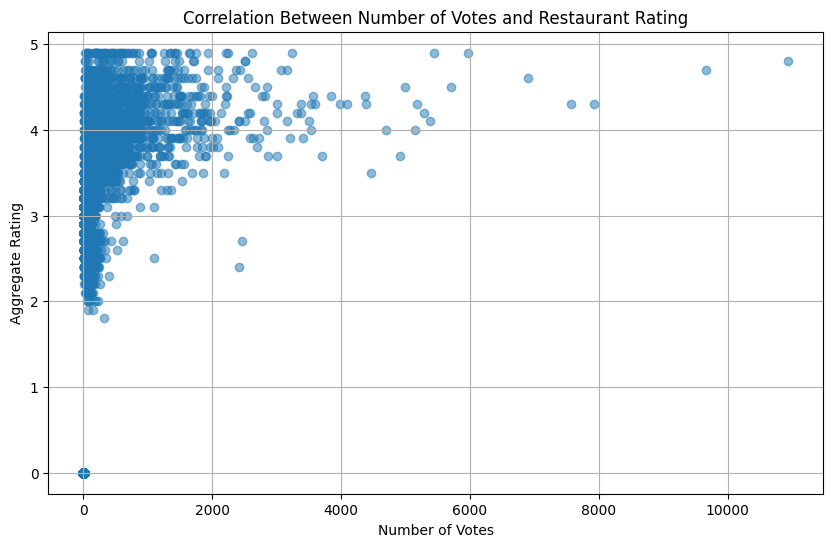

In [88]:
# Plot a scatter plot to analyze the correlation
plt.figure(figsize=(10, 6))
plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.5)
plt.title('Correlation Between Number of Votes and Restaurant Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.grid(True)

# Calculate and print the correlation coefficient
correlation_coefficient = df['Votes'].corr(df['Aggregate rating'])
print(f"Correlation Coefficient: {correlation_coefficient}")

plt.show()

3. Task: Price Range vs. Online Delivery and
Table Booking
        A } Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
        B } Determine if higher-priced restaurants are more likely to offer these services.

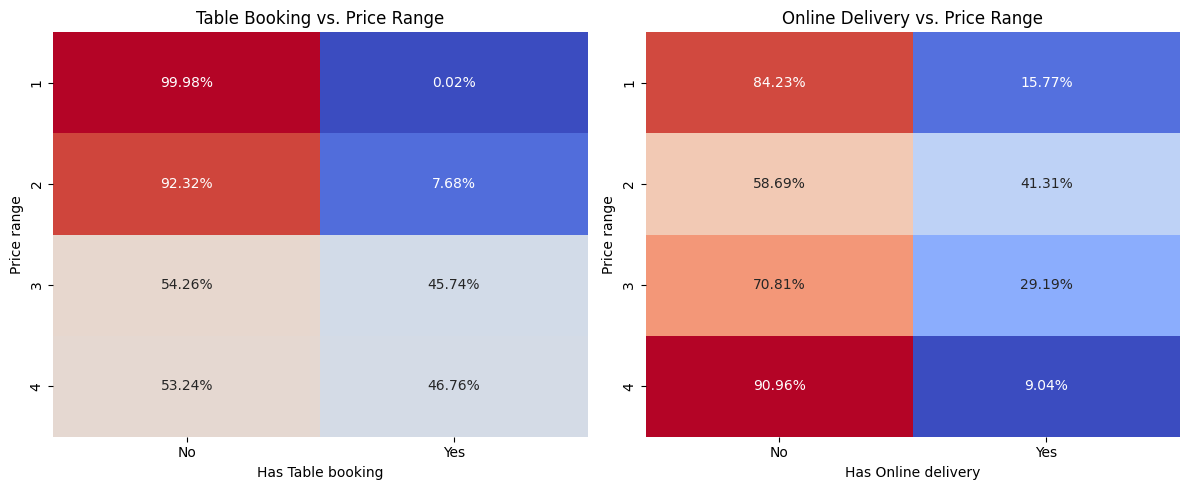

In [89]:

# Task A: Relationship between price range and online delivery
table_booking_relationship = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack(fill_value=0)
online_delivery_relationship = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack(fill_value=0)

# Plot the relationships
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(table_booking_relationship, annot=True, fmt=".2%", cmap="coolwarm", cbar=False)
plt.title('Table Booking vs. Price Range')

plt.subplot(1, 2, 2)
sns.heatmap(online_delivery_relationship, annot=True, fmt=".2%", cmap="coolwarm", cbar=False)
plt.title('Online Delivery vs. Price Range')

plt.tight_layout()
plt.show()

In [90]:



# Task B: Determine if higher-priced restaurants offer table booking and online delivery
price_range_crosstab = pd.crosstab(df['Price range'], [df['Has Table booking'], df['Has Online delivery']])
chi2, p, _, _ = chi2_contingency(price_range_crosstab)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant relationship between price range and the availability of table booking and online delivery.")
else:
    print("There is no statistically significant relationship between price range and the availability of table booking and online delivery.")


Chi-squared statistic: 3778.7126357124143
P-value: 0.0
There is a statistically significant relationship between price range and the availability of table booking and online delivery.
